In [9]:
import pandas as pd 
from math import sqrt 
import random 

In [11]:
df_world = pd.read_csv("Model/merged_dfs_world_noNA.csv") 
df_mena = pd.read_csv("Model/merged_dfs_MENA_noNA.csv") 

# Cleaning Data Frames 

In [12]:
unnamed = df_world.columns.str.contains("Unnamed")
df_world = df_world.drop(df_world.columns[unnamed], axis = 1).drop(["date", "Time", "iso3", "country", "geo", "economy"], axis = 1)
df_world.head()

,country_code,protest,revolution,riots,strike,unrest,violence,Country,BN.CAB.XOKA.GD.ZS,BX.KLT.DINV.WD.GD.ZS,...,SL.UEM.TOTL.ZS,SM.POP.TOTL.ZS,SN.ITK.MSFI.ZS,SP.DYN.LE00.FE.IN,SP.DYN.LE00.MA.IN,SP.URB.TOTL.IN.ZS,ST.INT.ARVL,ST.INT.DPRT,year,unrest_index
0,ARM,0.000000,0.500000,1.583333,1.166667,1.133333,0.333333,Armenia,-7.419656,2.142048,...,13.21,1.478107,14.800000,79.601,69.992,63.149,1652000.0,1.623000e+06,2018,0.625356
1,ARM,0.375000,1.000000,1.166667,0.958333,0.850000,0.375000,Armenia,-7.320340,0.736361,...,12.20,1.594897,12.700000,79.856,70.403,63.219,1894000.0,1.868000e+06,2019,0.589952
2,ATG,0.500000,0.166667,0.750000,3.083333,0.566667,1.166667,Antigua and Barbuda,-14.549840,12.740698,...,9.78,1.711686,11.666667,81.000,75.724,24.599,1064000.0,2.881333e+06,2018,0.001359
3,ATG,0.416667,0.750000,0.833333,2.083333,0.283333,0.916667,Antigua and Barbuda,-7.520282,7.599909,...,7.36,1.828475,10.633333,81.171,75.909,24.506,1035000.0,3.894667e+06,2019,0.000519
4,AZE,0.125000,0.916667,0.125000,2.500000,0.000000,0.416667,Azerbaijan,12.843768,2.977946,...,4.94,1.945264,9.600000,75.708,69.693,55.680,2850000.0,4.908000e+06,2018,3.535706


In [13]:
cols = list(df_world.columns) 
targets = ["year", "Country", "country_code"] 
for col in targets: 
    cols.insert(0, cols.pop(cols.index(col))) 
df_world = df_world.loc[:, cols] 
df_world = df_world.sort_values(["country_code", "year"])
df_world

,country_code,Country,year,protest,revolution,riots,strike,unrest,violence,BN.CAB.XOKA.GD.ZS,...,SL.UEM.INTM.ZS,SL.UEM.TOTL.ZS,SM.POP.TOTL.ZS,SN.ITK.MSFI.ZS,SP.DYN.LE00.FE.IN,SP.DYN.LE00.MA.IN,SP.URB.TOTL.IN.ZS,ST.INT.ARVL,ST.INT.DPRT,unrest_index
0,ARM,Armenia,2018,0.000000,0.500000,1.583333,1.166667,1.133333,0.333333,-7.419656,...,13.390000,13.210,1.478107,14.800000,79.601,69.992,63.149,1652000.0,1.623000e+06,0.625356
1,ARM,Armenia,2019,0.375000,1.000000,1.166667,0.958333,0.850000,0.375000,-7.320340,...,12.000000,12.200,1.594897,12.700000,79.856,70.403,63.219,1894000.0,1.868000e+06,0.589952
2,ATG,Antigua and Barbuda,2018,0.500000,0.166667,0.750000,3.083333,0.566667,1.166667,-14.549840,...,9.503333,9.780,1.711686,11.666667,81.000,75.724,24.599,1064000.0,2.881333e+06,0.001359
3,ATG,Antigua and Barbuda,2019,0.416667,0.750000,0.833333,2.083333,0.283333,0.916667,-7.520282,...,7.006667,7.360,1.828475,10.633333,81.171,75.909,24.506,1035000.0,3.894667e+06,0.000519
4,AZE,Azerbaijan,2018,0.125000,0.916667,0.125000,2.500000,0.000000,0.416667,12.843768,...,4.510000,4.940,1.945264,9.600000,75.708,69.693,55.680,2850000.0,4.908000e+06,3.535706
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
750,ZWE,Zimbabwe,2015,0.250000,8.583333,0.500000,2.916667,0.125000,5.916667,-7.998095,...,9.264000,5.282,2.556383,64.700000,61.637,57.320,32.385,2057000.0,3.393000e+06,0.035166
751,ZWE,Zimbabwe,2016,0.500000,8.250000,0.416667,3.416667,0.208333,6.166667,-3.394138,...,9.228000,5.796,2.556383,66.700000,62.416,57.956,32.296,2168000.0,3.192000e+06,0.088278
752,ZWE,Zimbabwe,2017,1.583333,8.500000,2.916667,4.250000,0.333333,8.666667,-1.542184,...,9.192000,6.279,2.556383,67.000000,62.956,58.208,32.237,2423000.0,2.768000e+06,0.098554
753,ZWE,Zimbabwe,2018,0.791667,6.583333,0.750000,3.166667,0.458333,6.916667,-4.039183,...,9.156000,6.784,2.556383,66.700000,63.594,58.968,32.209,2580000.0,2.288000e+06,0.088772


In [14]:
unnamed = df_mena.columns.str.contains("Unnamed")
df_mena = df_mena.drop(df_mena.columns[unnamed], axis = 1).drop(["code", "date", "iso3", "country_x", "country_y", "geo_x", "geo_y", "economy", "Time"], axis = 1)
df_mena.head()

,protest,revolution,riots,strike,unrest,violence,country_code,Country,BN.CAB.XOKA.GD.ZS,BX.KLT.DINV.WD.GD.ZS,...,SM.POP.TOTL.ZS,SN.ITK.MSFI.ZS,SP.DYN.LE00.FE.IN,SP.DYN.LE00.MA.IN,SP.URB.TOTL.IN.ZS,ST.INT.ARVL,ST.INT.DPRT,year,month,unrest_index
0,0.0,5.0,0.0,26.0,1.0,3.0,DZA,Algeria,-16.289765,-0.324012,...,0.611072,22.900000,76.82400,74.45600,70.848000,1.710000e+06,3.638000e+06,2016,6,0.070350
1,0.5,4.0,0.0,20.0,0.0,5.0,DZA,Algeria,-16.296788,-0.211703,...,0.611072,22.783333,76.82225,74.47575,70.898917,1.737417e+06,3.712333e+06,2016,7,0.116459
2,0.0,4.0,0.0,20.0,0.0,4.0,DZA,Algeria,-16.303810,-0.099394,...,0.611072,22.666667,76.82050,74.49550,70.949833,1.764833e+06,3.786667e+06,2016,8,0.060329
3,0.0,3.0,0.0,15.0,0.0,3.0,DZA,Algeria,-16.310832,0.012915,...,0.611072,22.550000,76.81875,74.51525,71.000750,1.792250e+06,3.861000e+06,2016,9,0.275856
4,0.5,4.0,0.0,13.0,0.0,5.0,DZA,Algeria,-16.317854,0.125224,...,0.611072,22.433333,76.81700,74.53500,71.051667,1.819667e+06,3.935333e+06,2016,10,0.125005


In [15]:
cols = list(df_mena.columns) 
targets = ["month", "year", "Country", "country_code"] 
for col in targets: 
    cols.insert(0, cols.pop(cols.index(col))) 
df_mena = df_mena.loc[:, cols] 
df_mena = df_mena.sort_values(["country_code", "year"])
df_mena

,country_code,Country,year,month,protest,revolution,riots,strike,unrest,violence,...,SL.UEM.INTM.ZS,SL.UEM.TOTL.ZS,SM.POP.TOTL.ZS,SN.ITK.MSFI.ZS,SP.DYN.LE00.FE.IN,SP.DYN.LE00.MA.IN,SP.URB.TOTL.IN.ZS,ST.INT.ARVL,ST.INT.DPRT,unrest_index
0,DZA,Algeria,2016,6,0.0,5.0,0.0,26.0,1.0,3.0,...,22.43,11.210000,0.611072,22.900000,76.824000,74.456000,70.848000,1.710000e+06,3.638000e+06,0.070350
1,DZA,Algeria,2016,7,0.5,4.0,0.0,20.0,0.0,5.0,...,22.43,11.125833,0.611072,22.783333,76.822250,74.475750,70.898917,1.737417e+06,3.712333e+06,0.116459
2,DZA,Algeria,2016,8,0.0,4.0,0.0,20.0,0.0,4.0,...,22.43,11.041667,0.611072,22.666667,76.820500,74.495500,70.949833,1.764833e+06,3.786667e+06,0.060329
3,DZA,Algeria,2016,9,0.0,3.0,0.0,15.0,0.0,3.0,...,22.43,10.957500,0.611072,22.550000,76.818750,74.515250,71.000750,1.792250e+06,3.861000e+06,0.275856
4,DZA,Algeria,2016,10,0.5,4.0,0.0,13.0,0.0,5.0,...,22.43,10.873333,0.611072,22.433333,76.817000,74.535000,71.051667,1.819667e+06,3.935333e+06,0.125005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
908,TUN,Tunisia,2019,3,0.0,13.0,0.0,7.0,0.0,11.0,...,15.62,15.427500,0.503850,21.575000,79.275500,72.854250,68.869250,7.987250e+06,2.343750e+06,0.278695
909,TUN,Tunisia,2019,4,1.0,11.0,0.0,5.0,0.0,8.0,...,15.62,15.438333,0.503850,21.750000,79.291333,72.857500,68.894500,8.091167e+06,2.400833e+06,0.369249
910,TUN,Tunisia,2019,5,0.5,11.0,0.0,6.0,0.0,5.0,...,15.62,15.449167,0.503850,21.925000,79.307167,72.860750,68.919750,8.195083e+06,2.457917e+06,0.145655
911,TUN,Tunisia,2019,6,0.0,10.0,1.0,7.0,0.0,5.0,...,15.62,15.460000,0.503850,22.100000,79.323000,72.864000,68.945000,8.299000e+06,2.515000e+06,0.278638


In [16]:
df_var_names = pd.read_csv("Independent variable - WB/WB_categories.csv")
df_var_names.drop(["Source", "Notes"], axis = 1, inplace = True) 
df_var_names

,Category,Variable description,Code
0,Poverty,Prevalence of moderate or severe food insecuri...,SN.ITK.MSFI.ZS
1,Poverty,Multidimensional poverty headcount ratio (% of...,SI.POV.MDIM
2,Poverty,Multidimensional poverty index (scale 0-1)(SI....,SI.POV.MDIM.XQ
3,Poverty,Poverty gap at $3.65 a day (2017 PPP) (%)(SI.P...,SI.POV.LMIC.GP
4,Poverty,Multidimensional poverty intensity (average sh...,SI.POV.MDIM.IT
5,Environment,CO2 emissions (kg per 2017 PPP $ of GDP)(EN.AT...,EN.ATM.CO2E.PP.GD.KD
6,Economic,Real interest rate (%)(FR.INR.RINR),FR.INR.RINR
7,Economic,Interest payments (% of revenue)(GC.XPN.INTP.R...,GC.XPN.INTP.RV.ZS
8,Economic,Interest rate spread (lending rate minus depos...,FR.INR.LNDP
9,Economic,"Inflation, GDP deflator (annual %)(NY.GDP.DEFL...",NY.GDP.DEFL.KD.ZG


# Random Forest Model (Regression)

In [17]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Create Model 

In [122]:
def fill_var_names(df): 
    try: 
        return df_var_names[df_var_names["Code"] == df["var_code"]]["Variable description"].values[0] 
    except: 
        return df["var_code"]

In [166]:
def apply_rf(df, num_identities, num_estimators, random_state, to_print = False, to_graph = False, show_features = False): 
    X = df.iloc[:, num_identities:-1]
    y = df.iloc[:, -1]

    # split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = random_state)

    # create a random forest regressor
    rf_reg = RandomForestRegressor(n_estimators = num_estimators, random_state = random_state)

    # fit the model to the training data
    rf_reg.fit(X_train, y_train)

    # make predictions on the testing data
    y_pred = rf_reg.predict(X_test) 

    # calculate the mean squared error of the predictions
    mse = mean_squared_error(y_test, y_pred)

    # calculate the r^2 value fitted to y = x 
    r_squared = r2_score(y_test, y_pred) 

    # calculate feature importance 
    feature_importances = pd.DataFrame({"var_code": X_train.columns, "importance": rf_reg.feature_importances_}).sort_values('importance', ascending=False)

    feature_importances["var_name"] = feature_importances.apply(lambda x: fill_var_names(x), axis = 1) 
    feature_importances = feature_importances[["var_code", "var_name", "importance"]] 

    if to_print: 
        print("Root Mean Square:", sqrt(mse))
        print("R^2:", r_squared, "\n")

    if show_features: 
            print(feature_importances.head(10))

    if to_graph: 
        
        # Plot feature importance
        plt.figure(figsize=(10, 5))
        sns.barplot(x = feature_importances["var_code"], y = feature_importances['importance'])
        plt.xticks(rotation=90)
        plt.title('Feature Importance')
        plt.show()

        # Calculate residuals
        residuals = y_test - y_pred

        # Plot residuals against predicted values
        plt.scatter(y_pred, residuals)
        plt.xlabel('Predicted Values')
        plt.ylabel('Residuals')
        plt.title('Residual Plot')
        plt.axhline(y=0, color='r', linestyle='-')
        plt.show() 

        # Plot predictions against predicted values
        plt.scatter(y_test, y_pred)
        plt.xlabel('Predicted Values')
        plt.ylabel('Actual Values')
        plt.title('Predictions vs. Actual Values')
        x_range = np.linspace(0, 5, 100)
        plt.plot(x_range, x_range, linestyle='-', color='red')
        plt.show()

    return sqrt(mse), r_squared, feature_importances 

## Evaluate and Optimise Model Performance 

### Optimising num_estimators 

In [167]:
def optimise_num_estimators(df, num_identities, random_state, to_plot = False, to_print = False): 
    """Takes a df, apply random forest model and return the num_estimators that optimises the model performance"""
    x, rmse_list, r2_list = [], [], []
    for num_estimators in range(1, 51): 
        model_outcome = apply_rf(df, num_identities, num_estimators, random_state)
        rmse, r2 = model_outcome[0], model_outcome[1]
        x.append(num_estimators)
        rmse_list.append(rmse) 
        r2_list.append(r2) 

    optimal_num_estimators = (x[rmse_list.index(min(rmse_list))] + x[r2_list.index(max(r2_list))])//2

    if to_plot: 
        plt.plot(x, rmse_list, color = "r")
        plt.plot(x, r2_list, color = "b") 
        plt.xlabel("num_estimators")
        plt.ylabel("performance") 
        plt.title("num_estimators vs. model performance")
        plt.show()

    if to_print: 
        print("Optimal num_estimators:", optimal_num_estimators)

    return optimal_num_estimators

### Model Performance

#### Model Performance and Feature Importance over one Run (random_state = 42)

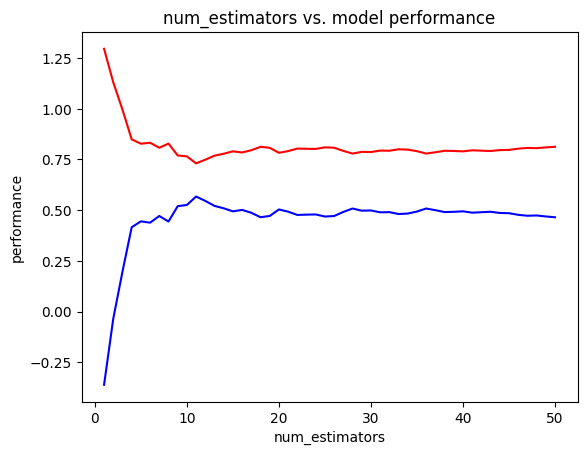

Optimal num_estimators: 11


In [168]:
num_estimators = optimise_num_estimators(df_world, 3, 42, True, True) 

Root Mean Square: 0.7306183240029692
R^2: 0.5671348440170569 

                var_code                                           var_name  \
19     GC.TAX.TOTL.GD.ZS          Tax revenue (% of GDP)(GC.TAX.TOTL.GD.ZS)   
13           EN.URB.LCTY            Population in largest city(EN.URB.LCTY)   
50        SN.ITK.MSFI.ZS  Prevalence of moderate or severe food insecuri...   
37        SH.MED.NUMW.P3  Nurses and midwives (per 1,000 people)(SH.MED....   
28  SE.ADT.1524.LT.FM.ZS  Literacy rate, youth (ages 15-24), gender pari...   
12     EN.POP.SLUM.UR.ZS  Population living in slums (% of urban populat...   
16           FR.INR.RINR                Real interest rate (%)(FR.INR.RINR)   
15           FR.INR.LNDP  Interest rate spread (lending rate minus depos...   
23        NY.GDP.MKTP.KD            GDP (constant 2015 US$)(NY.GDP.MKTP.KD)   
20     GC.XPN.INTP.RV.ZS  Interest payments (% of revenue)(GC.XPN.INTP.R...   

    importance  
19    0.187529  
13    0.132268  
50    0.075999  

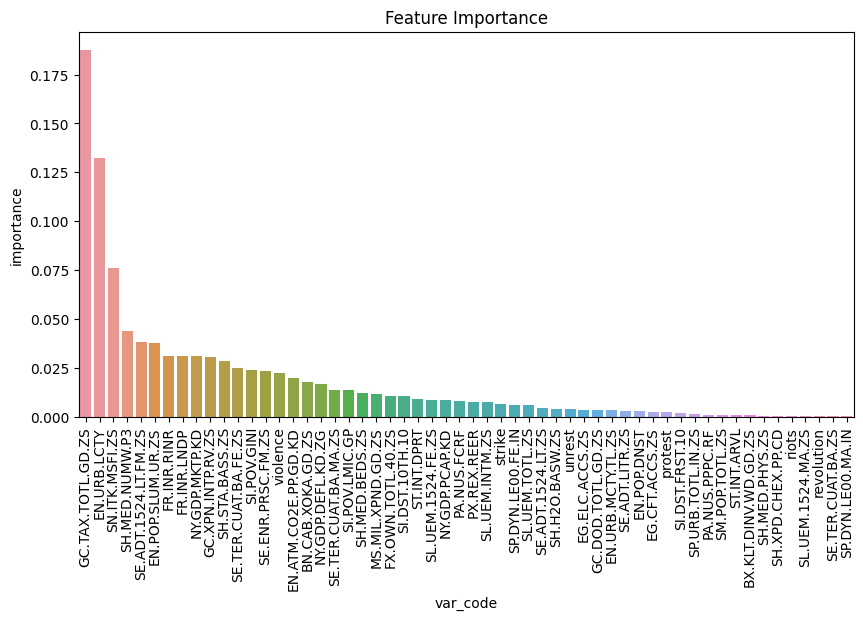

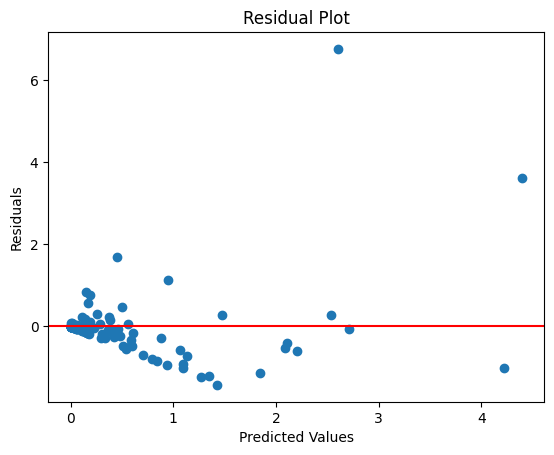

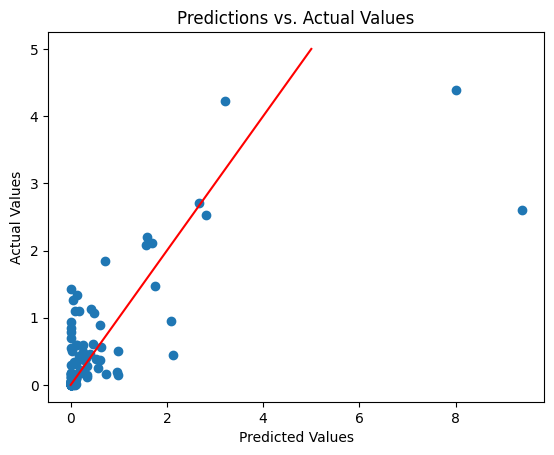

In [169]:
model_output = apply_rf(df_world, 3, num_estimators, 42, True, True, True) 
world_rmse, world_r2 = model_output[0], model_output[1]

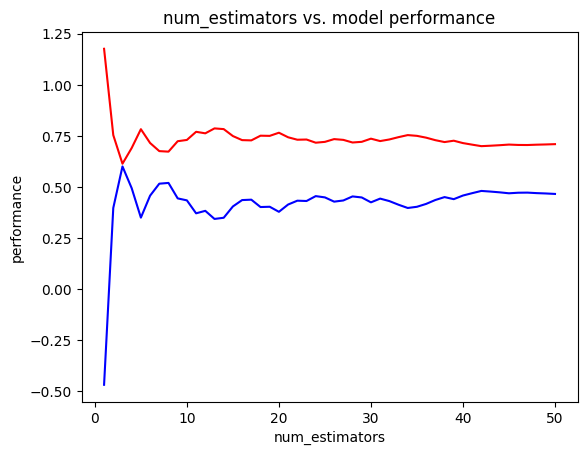

Optimal num_estimators: 3


In [170]:
num_estimators = optimise_num_estimators(df_mena, 4, 42, True, True) 

Root Mean Square: 0.6135662232751653
R^2: 0.6003055022234196 

             var_code                                           var_name  \
23     NY.GDP.MKTP.KD            GDP (constant 2015 US$)(NY.GDP.MKTP.KD)   
39  SH.XPD.CHEX.PP.CD  Current health expenditure per capita, PPP (cu...   
24     NY.GDP.PCAP.KD  GDP per capita (constant 2015 US$)(NY.GDP.PCAP...   
1          revolution                                         revolution   
12  EN.POP.SLUM.UR.ZS  Population living in slums (% of urban populat...   
3              strike                                             strike   
14  EN.URB.MCTY.TL.ZS  Population in urban agglomerations of more tha...   
13        EN.URB.LCTY            Population in largest city(EN.URB.LCTY)   
49     SN.ITK.MSFI.ZS  Prevalence of moderate or severe food insecuri...   
2               riots                                              riots   

    importance  
23    0.156734  
39    0.154656  
24    0.139490  
1     0.127818  
12    0.062999 

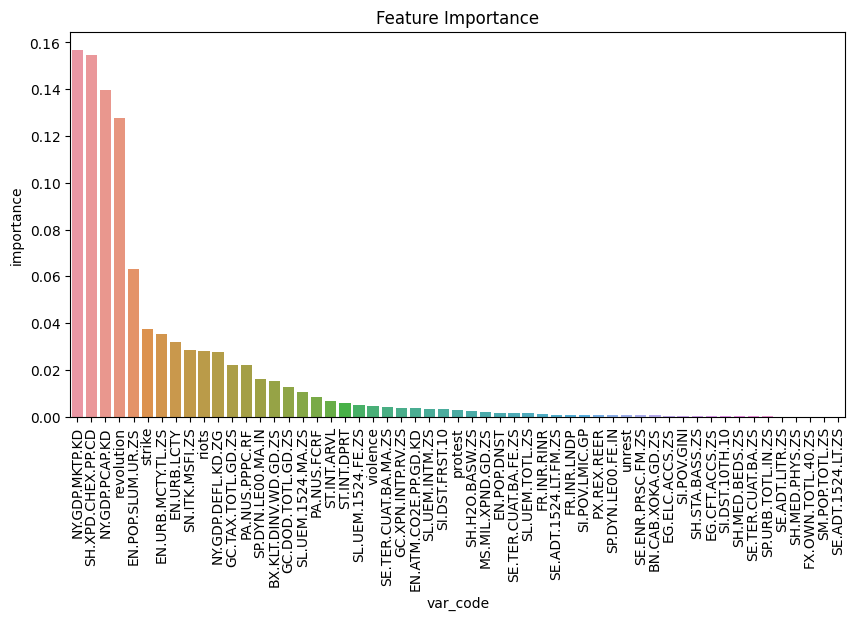

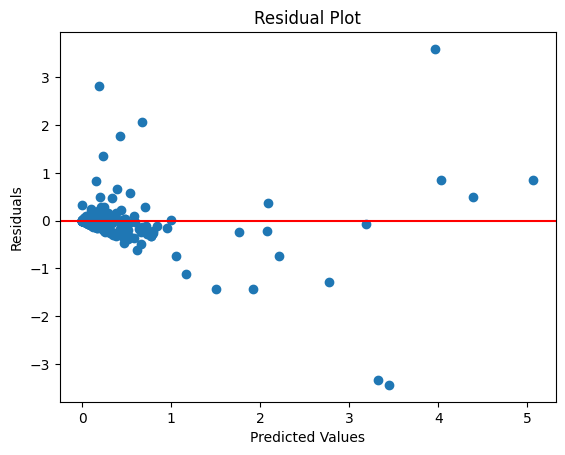

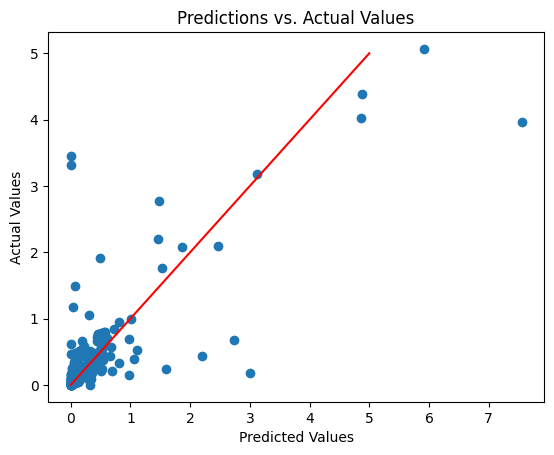

In [171]:
model_output = apply_rf(df_mena, 4, num_estimators, 42, True, True, True)
mena_rmse, mena_r2 = model_output[0], model_output[1]

In [172]:
world_mean = df_world["unrest_index"].mean()
mena_mean = df_mena["unrest_index"].mean()
world_std = df_world["unrest_index"].std()
mena_std = df_mena["unrest_index"].std()
world_range = max(df_world["unrest_index"]) - min(df_world["unrest_index"])
mena_range = max(df_mena["unrest_index"]) - min(df_mena["unrest_index"])

In [173]:
print("World Dataset Prediction:") 
print(f"mean = {world_mean}")
print(f"std = {world_std}")
print(f"range = {world_range}")
print(f"rmse = {world_rmse}")
print(f"r^2 = {world_r2}\n") 

print("MENA Dataset Prediction:") 
print(f"mean = {mena_mean}")
print(f"std = {mena_std}")
print(f"range = {mena_range}")
print(f"rmse = {mena_rmse}")
print(f"r^2 = {mena_r2}\n") 

World Dataset Prediction:
mean = 0.31621928987774717
std = 1.0573075501716074
range = 10.867979371908731
rmse = 0.7306183240029692
r^2 = 0.5671348440170569

MENA Dataset Prediction:
mean = 0.4271366110902651
std = 0.9184371690759472
range = 9.966325510873483
rmse = 0.6135662232751653
r^2 = 0.6003055022234196



#### Long Run Average Model Performance 

In [161]:
def get_long_run_avg(df, num_identities, num_trials): 
    num_estimators_list, rmse_list, r2_list, feature_importance_list = [], [], [], []
    
    # creating a random list for random_state 
    rand_list = []
    for i in range(0, num_trials): 
        rand_list.append(random.randint(0, num_trials*100)) 
    
    # run the random forest for num_trial times using the random_state from rand_list 
    for random_state in rand_list: 
        num_estimators = optimise_num_estimators(df, num_identities, random_state) 
        model_outcome = apply_rf(df, num_identities, num_estimators, random_state) 
        num_estimators_list.append(num_estimators)
        rmse_list.append(model_outcome[0])
        r2_list.append(model_outcome[1]) 
        feature_importance_list.append(model_outcome[2]) 

    avg_num_estimators = sum(num_estimators_list)/len(num_estimators_list)
    rmse = sum(rmse_list)/len(rmse_list) 
    r2 = sum(r2_list)/len(r2_list) 
    df_features = pd.concat(feature_importance_list, axis = "columns") 
    #df_features = pd.DataFrame({"var_code": df_features["var_code"], "var_name": df_features["var_name"], "importance": pd.DataFrame(df_features.iloc[3:].mean(axis = 1).values)}).sort_values("importance", ascending = False)

    return avg_num_estimators, rmse, r2, df_features 

In [162]:
num_estimators, rmse, r2, df_features = get_long_run_avg(df_world, 3, 2) 
df_features

,var_code,var_name,importance,var_code,var_name,importance
13,EN.URB.LCTY,Population in largest city(EN.URB.LCTY),0.177274,EN.URB.LCTY,Population in largest city(EN.URB.LCTY),0.050694
39,SH.STA.BASS.ZS,People using at least basic sanitation service...,0.173241,SH.STA.BASS.ZS,People using at least basic sanitation service...,0.002836
23,NY.GDP.MKTP.KD,GDP (constant 2015 US$)(NY.GDP.MKTP.KD),0.074906,NY.GDP.MKTP.KD,GDP (constant 2015 US$)(NY.GDP.MKTP.KD),0.085578
19,GC.TAX.TOTL.GD.ZS,Tax revenue (% of GDP)(GC.TAX.TOTL.GD.ZS),0.060389,GC.TAX.TOTL.GD.ZS,Tax revenue (% of GDP)(GC.TAX.TOTL.GD.ZS),0.285835
17,FX.OWN.TOTL.40.ZS,Account ownership at a financial institution o...,0.050556,FX.OWN.TOTL.40.ZS,Account ownership at a financial institution o...,0.001530
1,revolution,revolution,0.045903,revolution,revolution,0.000888
34,SE.TER.CUAT.BA.ZS,"Educational attainment, at least Bachelor's or...",0.041117,SE.TER.CUAT.BA.ZS,"Educational attainment, at least Bachelor's or...",0.014740
4,unrest,unrest,0.029554,unrest,unrest,0.001494
54,ST.INT.ARVL,"International tourism, number of arrivals(ST.I...",0.025955,ST.INT.ARVL,"International tourism, number of arrivals(ST.I...",0.013944
31,SE.ENR.PRSC.FM.ZS,"School enrollment, primary and secondary (gros...",0.024348,SE.ENR.PRSC.FM.ZS,"School enrollment, primary and secondary (gros...",0.024588


In [158]:
num_trials = 2
num_estimators, rmse, r2, df_features = get_long_run_avg(df_world, 3, num_trials) 
print(f"World Dataset Performance over {num_trials} trials:") 
print(f"num_estimators = {num_estimators}")
print(f"rmse = {rmse}")
print(f"r^2 = {r2}") 
print("Feature Importance (Top 10):") 
print(df_features)

/var/folders/64/lts2my7j2q3g96y6cn7715xw0000gn/T/ipykernel_45337/2425415906.py:22: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_features = pd.DataFrame({"var_code": df_features["var_code"], "var_name": df_features["var_name"], "importance": pd.DataFrame(df_features.iloc[3:].mean(axis = 1).values)}).sort_values("importance", ascending = False)


ValueError: If using all scalar values, you must pass an index

In [264]:
num_estimators, rmse, r2, df_features = get_long_run_avg(df_mena, 4, num_trials) 
print(f"MENA Dataset Performance over {num_trials} trials:") 
print(f"num_estimators = {num_estimators}")
print(f"rmse = {rmse}")
print(f"r^2 = {r2}") 
print("Feature Importance (Top 10):") 
print(df_features.head(10))

MENA Dataset Performance over 100 trials:
num_estimators = 20.91
rmse = 0.5478816556066345
r^2 = 0.6404244681188647
Feature Importance (Top 10):
                   importance
SP.URB.TOTL.IN.ZS    0.132654
NY.GDP.MKTP.KD       0.101416
NY.GDP.PCAP.KD       0.093988
SH.XPD.CHEX.PP.CD    0.078963
revolution           0.078930
SP.DYN.LE00.MA.IN    0.063669
EN.URB.MCTY.TL.ZS    0.051914
GC.DOD.TOTL.GD.ZS    0.030349
GC.TAX.TOTL.GD.ZS    0.024204
EN.URB.LCTY          0.022606
